# HEART FAILURE PREDICTION

*MEDICAL REAKL WORLD PROBLEM STATEMENT:-*       
Cardiovascular diseases are the number 1 cause of death globally,taking an esitmated 17.9M lives each year which accounts for 31% of all deaths worldwide heartfailure is a common event caused by CVDs and this dataset contains 12 features that can be use to predict mortality by heart failure.If you are able to predict a person death event using some features---                  

***age,gender,bloood pressure, smoke, diabetes, ejection fractiion,creatinine phosphokinase,serum_creatinine,serum_sodium,time**

DATASET LINK---https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

**loading and exploring data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
print("shape of the data",data.shape)

shape of the data (299, 13)


In [10]:
print("info of data:---")
data.info()

info of data:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
print("describing data:--")
data.describe()

describing data:--


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
print("no. of null values")
data.isnull().sum().sum()

no. of null values


0

**exploratory data analysis**

Total no. of living cases:- 203
Total no. of died cases:- 96


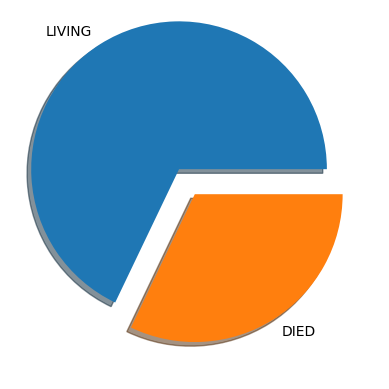

In [20]:
#seeing the distribution of classses,this will help us to identify which types 
len_live=len(data["DEATH_EVENT"][data.DEATH_EVENT==0])
len_death=len(data["DEATH_EVENT"][data.DEATH_EVENT==1])

arr=np.array([len_live,len_death])
labels=['LIVING','DIED']
print("Total no. of living cases:-",len_live)
print("Total no. of died cases:-",len_death)

plt.pie(arr,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

#inference=we are actually working on imbalance data
#imbalnce:-your data is not equally distributed between classes 

C:\Users\rajni\AppData\Local\Temp\ipykernel_6432\1123054077.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


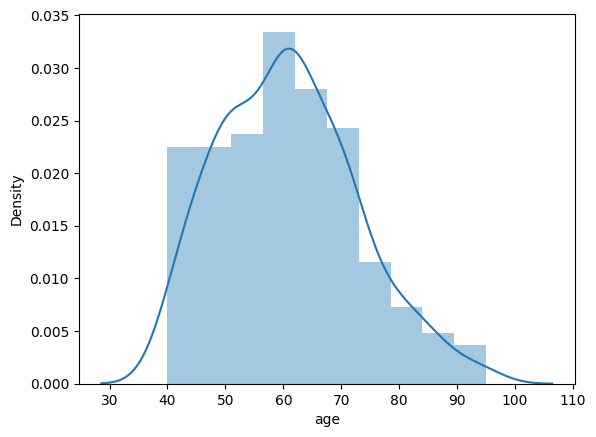

In [21]:
#seeing the disribution of age
sns.distplot(data['age'])
plt.show()

total no of died cases:- 85
total no of not died cases:- 167


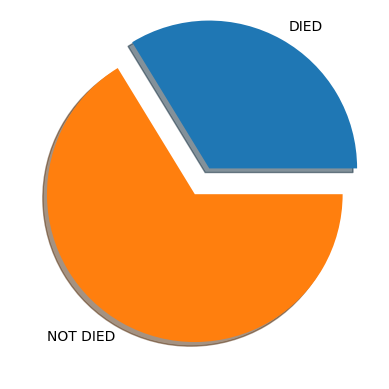

In [25]:
#selecting columns that are above age 50 and seeing died or not
age_above_50_not_died=data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==0]
age_above_50_died=data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==1]

len_died=len(age_above_50_died)
len_not_died=len(age_above_50_not_died)

print("total no of died cases:-",len_died)
print("total no of not died cases:-",len_not_died)

arr1=[len_died,len_not_died]
labels=['DIED','NOT DIED']

plt.pie(arr1,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

#inference: in most of the cases people aged above 50 not died but accordingly if you compare with above
#plot you will be seeingthat died ration is comparatively higher here 

no of not died with diabetes:- 118
no of died with diabetes:- 40


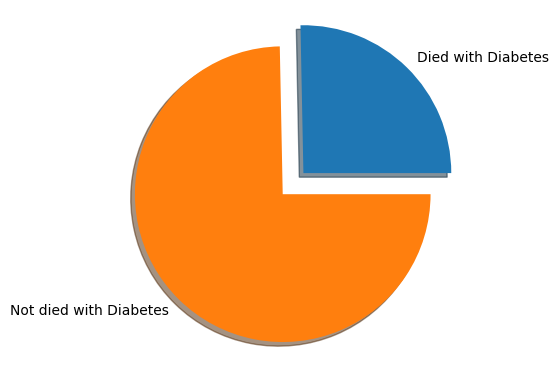

In [28]:
patient_nhave_diabetes=(data["DEATH_EVENT"][data.diabetes==0][data.DEATH_EVENT==0])
patient_have_diabetes=(data["DEATH_EVENT"][data.diabetes==1][data.DEATH_EVENT==1])

len_d_died=len(patient_have_diabetes)
len_d_alive=len(patient_nhave_diabetes)

print("no of not died with diabetes:-",len_d_alive)
print("no of died with diabetes:-",len_d_died)

arr2=[len_d_died,len_d_alive]
labels=['Died with Diabetes','Not died with Diabetes']
plt.pie(arr2,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

#inference: here you can see the that the most of the person are alive who have diabetes

<Axes: >

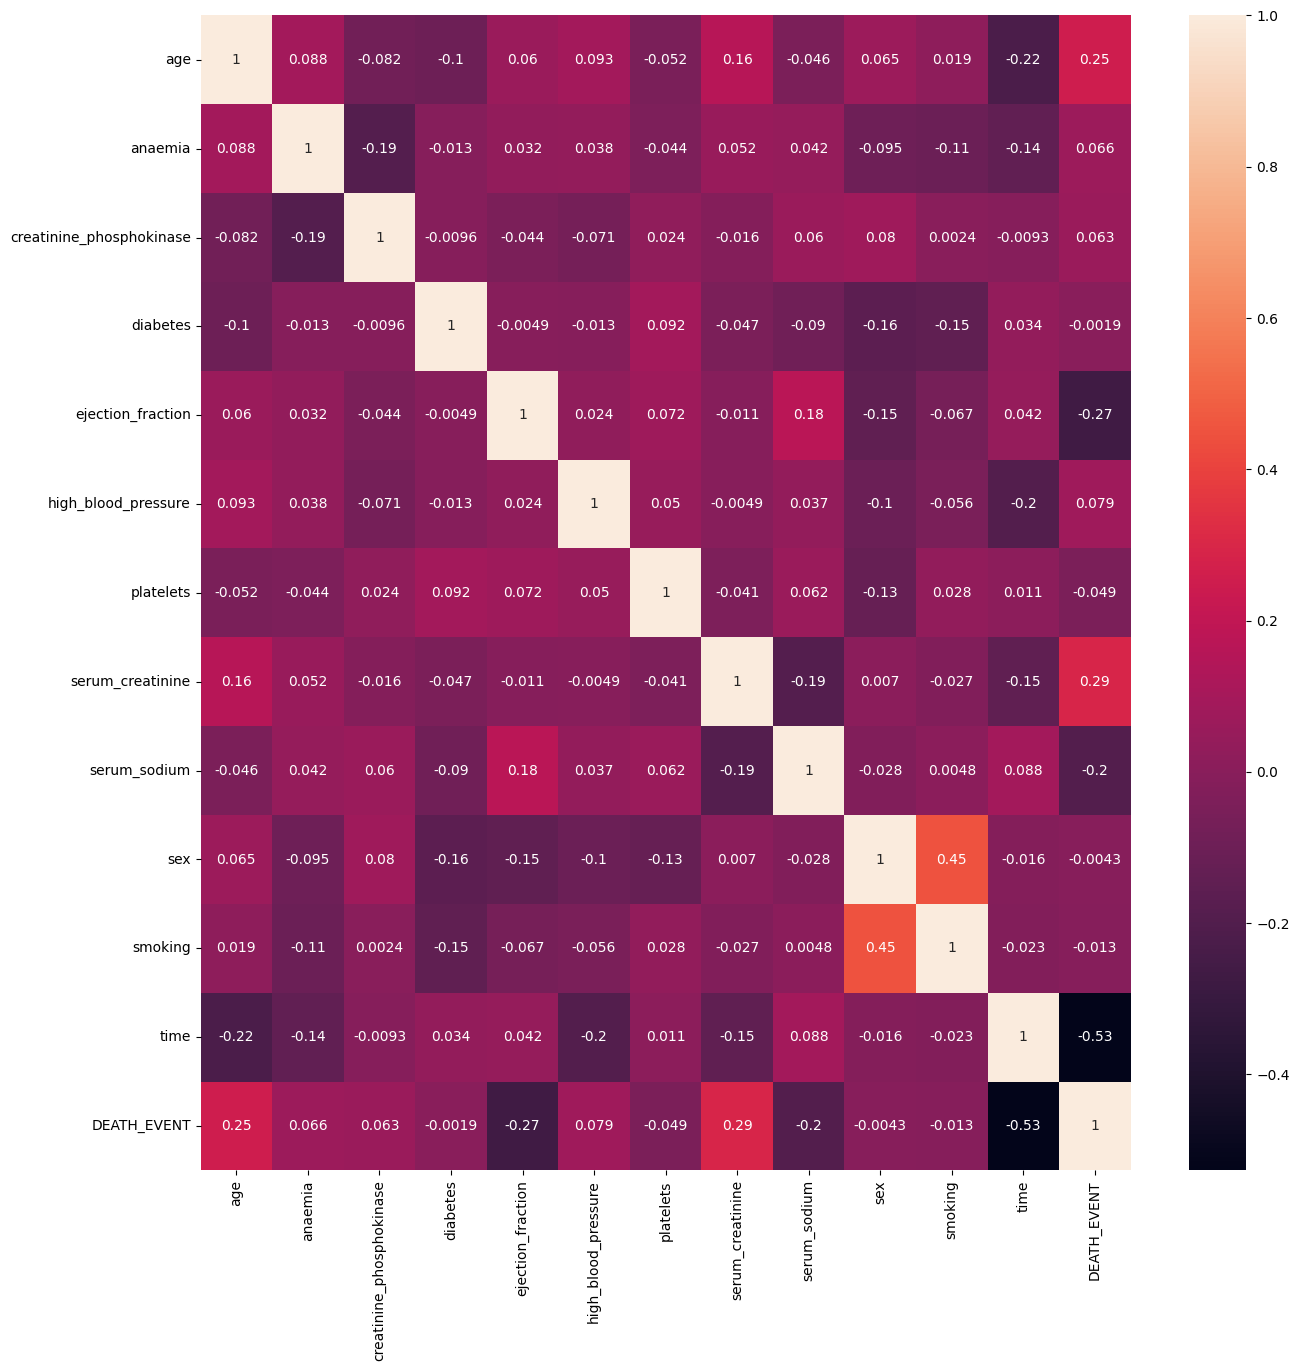

In [29]:
#checking the correlation of our variables
corr=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

# interpretation of correlation matrix

In [30]:
#we can do same as here above 
data.corr().style.background_gradient(cmap="coolwarm")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# Dataset Development

In [32]:
from sklearn.model_selection import train_test_split

X=data.drop('DEATH_EVENT',axis=1)
y=data["DEATH_EVENT"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("shape of the X_train",X_train.shape)
print("shape of the y_train",y_train.shape)
print("shape of the X_test",X_test.shape)
print("shape of the y_test",y_test.shape)

shape of the X_train (209, 12)
shape of the y_train (209,)
shape of the X_test (90, 12)
shape of the y_test (90,)


# feature engineering

In [33]:
#now,we will do feature engineering,we will add interation items are the product of two features so below the function prepared for inrteraction terms

def add_interactions(X):
    features=X.columns
    m=len(features)
    X_int=X.copy(deep=True)

    for i in range(m):
        feature_i_name=features[i]
        feature_i_data=X[feature_i_name]

        for j in range(i+1,m):
            feature_j_name=features[j]
            feature_j_data=X[feature_j_name]
            feature_i_j_name=feature_i_name+"_X_"+feature_j_name
            X_int[feature_i_j_name]=feature_i_data*feature_j_data
    return X_int

x_train_mod=add_interactions(X_train)
x_test_mod=add_interactions(X_test)        

In [34]:
x_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_X_serum_sodium,serum_creatinine_X_sex,serum_creatinine_X_smoking,serum_creatinine_X_time,serum_sodium_X_sex,serum_sodium_X_smoking,serum_sodium_X_time,sex_X_smoking,sex_X_time,smoking_X_time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,...,367.2,2.7,2.7,675.0,136,136,34000,1,250,250
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,...,156.2,0.0,0.0,36.3,0,0,4686,0,0,0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,...,176.8,1.3,1.3,275.6,136,136,28832,1,212,212
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,...,126.0,0.0,0.0,156.6,0,0,24360,0,0,0
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,...,120.6,0.9,0.9,106.2,134,134,15812,1,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,...,114.4,0.0,0.0,172.0,0,0,30745,0,0,0
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,...,91.0,0.7,0.0,122.5,130,0,22750,0,175,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,...,441.6,0.0,0.0,300.8,0,0,12972,0,0,0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,...,82.8,0.6,0.6,24.0,138,138,5520,1,40,40


# model building

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
def evaluating_model(y_test,y_pred):
    #function for evaluating models
    print("accuracy Score:-",accuracy_score(y_test,y_pred))
    print("precision Score:-",precision_score(y_test,y_pred))
    print("recall Score:-",recall_score(y_test,y_pred))
    print("confusion matrix:-\n",confusion_matrix(y_test,y_pred))

In [37]:
#Building logistic regression model as a baseline model
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)

lr_clf_pred=lr_clf.predict(X_test)



C:\Users\rajni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
y_pred=lr_clf.predict(X_test)
evaluating_model(y_test,y_pred)

accuracy Score:- 0.8111111111111111
precision Score:- 0.8235294117647058
recall Score:- 0.5
confusion matrix:-
 [[59  3]
 [14 14]]


In [40]:
#Buildling logistic regression model as a standardscalar

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip=make_pipeline(StandardScaler(),LogisticRegression())
lr_clf_pip.fit(X_train,y_train)

y_pred1=lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)

accuracy Score:- 0.8111111111111111
precision Score:- 0.7894736842105263
recall Score:- 0.5357142857142857
confusion matrix:-
 [[58  4]
 [13 15]]


In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#defining parameter of range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':["rbf"]}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [42]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [44]:
svc=SVC(C=10,gamma=0.0001)
svc.fit(X_train,y_train)
y_pred2=svc.predict(X_test)
evaluating_model(y_test,y_pred2)

accuracy Score:- 0.6777777777777778
precision Score:- 0.4
recall Score:- 0.07142857142857142
confusion matrix:-
 [[59  3]
 [26  2]]


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params,runs=20,clf=DecisionTreeClassifier(random_state=2)):
    rand_clf=RandomizedSearchCV(clf,params,n_iter=runs,cv=5,n_jobs=-1,random_state=2)
    rand_clf.fit(X_train,y_train)
    best_model=rand_clf.best_estimator_
    best_score=rand_clf.best_score_

    print("training score:{:.3f}".format(best_score))
    y_pred=best_model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('test score:{:3f}'.format(accuracy))

    return best_model

randomized_search(params={'criterion':['entropy','gini'],
                          'splitter':['random','best'],
                          'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01],
                          'min_samples_split':[2,3,4,5,6,8,10],
                          'min_samples_leaf':[1,0.01,0.02,0.03,0.04],
                          'min_impurity_decrease':[0.0,0.0005,0.005,0.05,0.10,0.15,0.2],
                          'max_leaf_nodes':[10,15,20,25,30,35,40,45,50,None],
                          'max_features':['auto',0.95,0.90,0.85,0.80,0.75,0.70],
                          'max_depth':[None,2,4,6,8],
                          'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01,0.05]})



training score:0.847
test score:0.755556


C:\Users\rajni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [49]:
ds_clf=DecisionTreeClassifier(max_depth=8,max_features=0.9,max_leaf_nodes=30,
                              min_impurity_decrease=0.05,min_samples_leaf=0.02,min_samples_split=10,
                              min_weight_fraction_leaf=0.005,random_state=2,splitter="random")
ds_clf.fit(X_train,y_train)
pred4=ds_clf.predict(X_test)
evaluating_model(y_test,pred4)                              

accuracy Score:- 0.8111111111111111
precision Score:- 0.72
recall Score:- 0.6428571428571429
confusion matrix:-
 [[55  7]
 [10 18]]


In [50]:
from sklearn.ensemble import RandomForestClassifier
randomized_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                           'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.2],
                           'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
                          'max_depth':[None,2,4,6,8,10,20],},
                          clf=RandomForestClassifier(random_state=2))

C:\Users\rajni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

training score:0.847
test score:0.866667


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [51]:
rf_clf=RandomForestClassifier(max_depth=2,max_features=0.5,min_impurity_decrease=0.01,
                              min_samples_leaf=10,random_state=2)
rf_clf.fit(X_train,y_train)
pred5=rf_clf.predict(X_test)
evaluating_model(y_test,pred5)

accuracy Score:- 0.8666666666666667
precision Score:- 0.9
recall Score:- 0.6428571428571429
confusion matrix:-
 [[60  2]
 [10 18]]


In [58]:
from xgboost import XGBClassifier
xgb1=XGBClassifier(colsample_bytree=1.0,
learning_rate=0.1,max_depth=4,n_estimators=400,
subsample=1.0)
eval_set=[(X_test,y_test)]

xgb1.fit(X_train,y_train,
         eval_set=eval_set,verbose=True)



[0]	validation_0-logloss:0.57444
[1]	validation_0-logloss:0.53675
[2]	validation_0-logloss:0.50777
[3]	validation_0-logloss:0.48659
[4]	validation_0-logloss:0.46540
[5]	validation_0-logloss:0.45034


[6]	validation_0-logloss:0.43492
[7]	validation_0-logloss:0.42562
[8]	validation_0-logloss:0.41523
[9]	validation_0-logloss:0.40096
[10]	validation_0-logloss:0.39540
[11]	validation_0-logloss:0.38980
[12]	validation_0-logloss:0.38287
[13]	validation_0-logloss:0.37953
[14]	validation_0-logloss:0.37523
[15]	validation_0-logloss:0.37315
[16]	validation_0-logloss:0.37093
[17]	validation_0-logloss:0.36779
[18]	validation_0-logloss:0.36587
[19]	validation_0-logloss:0.36552
[20]	validation_0-logloss:0.36157
[21]	validation_0-logloss:0.35722
[22]	validation_0-logloss:0.35401
[23]	validation_0-logloss:0.35249
[24]	validation_0-logloss:0.35012
[25]	validation_0-logloss:0.35006
[26]	validation_0-logloss:0.34743
[27]	validation_0-logloss:0.34570
[28]	validation_0-logloss:0.34361
[29]	validation_0-logloss:0.34192
[30]	validation_0-logloss:0.34045
[31]	validation_0-logloss:0.33929
[32]	validation_0-logloss:0.34078
[33]	validation_0-logloss:0.34032
[34]	validation_0-logloss:0.34012
[35]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
pred6=xgb1.predict(X_test)
evaluating_model(y_test,pred6)

accuracy Score:- 0.8444444444444444
precision Score:- 0.7692307692307693
recall Score:- 0.7142857142857143
confusion matrix:-
 [[56  6]
 [ 8 20]]


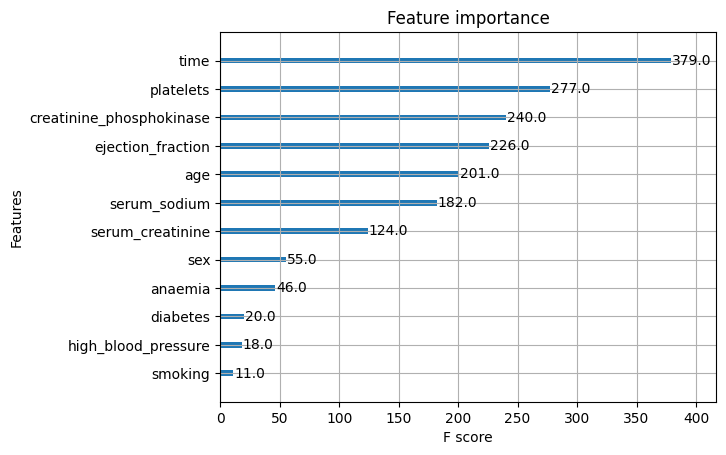

In [60]:
from xgboost import plot_importance
#xgb.feature_importance_
plot_importance(xgb1)
plt.show()

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,
                                max_depth=1,random_state=0)
gbdt.fit(X_train,y_train)
pred_gbdt=gbdt.predict(X_test)
evaluating_model(y_test,pred_gbdt)

accuracy Score:- 0.8555555555555555
precision Score:- 0.8571428571428571
recall Score:- 0.6428571428571429
confusion matrix:-
 [[59  3]
 [10 18]]


# choosing best model and saving them

In [62]:
#we will choose Xgboost
import joblib
joblib.dump(xgb1,'heartpredictor.pkl')
model=joblib.load('heartpredictor.pkl')
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])